In [12]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Tasks compeleted in this notebook
1. topics modeling
2. clustering
3. visualization

### Import data from EDA

In [4]:
df = pd.read_pickle(r'C:\Users\veda.nair\OneDrive - Accenture\Desktop\Documents\Data science project ideas\ecommerce_customer_sentiment_analysis\project_fletcher-master\notebooks\cleaned_df.pkl')
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  
0  Intimates   Absolutely wonderful - silky and sexy and com...  
1    Dresses   Love this dress!  it's sooo pretty.  i happen...  
2    Dresses  Some major design flaws I had such high hopes ...  
3      Pants  My favorite buy! I love, love, love this jumps...  
4    Blouses  Flattering shirt This shirt is very flattering...

### Remove frequent words

In [5]:
words_to_remove = ['love', 'dress', 'dresses']
text = 'I love things about dresses but not dress.'

import re
pattern = [f'(\\b{word}\\b)' for word in words_to_remove]
pattern = '|'.join(pattern)
re.sub(pattern, '', text)

'I  things about  but not .'

In [6]:
df['ReviewTextLower'] = df.ReviewText

In [7]:
df['ReviewTextLower'] = df.ReviewTextLower.str.lower()

In [8]:
df['ReviewTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [9]:
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

### Topic Modelings

In [10]:
# def functions for topic modelings
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def display_topics2(model, feature_names, no_top_words=10, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

In [13]:
# try using 50 dimensions
n_comp = 50
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [14]:
# topic modeling with lsa and tfidf
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),8)


Topic 0
true size (0.7192), fits true (0.2980), fits true size (0.2964), fit true (0.1697), fit true size (0.1689), looks great (0.0992), runs true (0.0958), runs true size (0.0944)

Topic 1
true size (0.3338), fits true (0.2025), fits true size (0.2014), fit true size (0.0718), fit true (0.0710), runs true size (0.0274), runs true (0.0245), true size flattering (0.0149)

Topic 2
looks great (0.8908), great jeans (0.1600), looks great jeans (0.1451), skinny jeans (0.0803), great skinny (0.0550), comfortable looks (0.0479), looks great skinny (0.0469), comfortable looks great (0.0468)

Topic 3
super cute (0.9415), highly recommend (0.0777), cute comfortable (0.0644), cute flattering (0.0515), super cute flattering (0.0505), cute material (0.0355), look great (0.0324), super comfy (0.0273)

Topic 4
fits true (0.4696), fits true size (0.4629), fits perfectly (0.1281), usually wear (0.0946), runs large (0.0678), looked like (0.0541), size small (0.0522), small fits (0.0504)

Topic 5
fit p

In [15]:
# topic modeling with lsa and countvectorizer
display_topics2(lsa_cv, count_vectorizer.get_feature_names(),10)


Topic 0
size (0.3564), fit (0.2671), like (0.2596), wear (0.2187), just (0.1980), great (0.1858), small (0.1774), fabric (0.1561), color (0.1481), ordered (0.1378)

Topic 1
size (0.7706), small (0.1342), true (0.1076), true size (0.1044), fit (0.0908), ordered (0.0890), size small (0.0494), large (0.0430), usual (0.0428), runs (0.0415)

Topic 2
like (0.6529), size (0.1377), look (0.1039), really (0.0915), just (0.0755), looked (0.0572), model (0.0542), fabric (0.0524), look like (0.0498), didn (0.0477)

Topic 3
wear (0.5227), small (0.4139), medium (0.1499), usually (0.1070), large (0.1022), runs (0.0787), usually wear (0.0772), shirt (0.0674), fits (0.0598), retailer (0.0531)

Topic 4
fit (0.5503), small (0.4304), medium (0.1505), ordered (0.1251), just (0.1075), xs (0.0922), large (0.0852), usually (0.0775), petite (0.0714), waist (0.0591)

Topic 5
just (0.6468), fabric (0.1598), color (0.1104), beautiful (0.1024), right (0.1017), really (0.0915), flattering (0.0712), soft (0.0673),

In [16]:
# topic modeling with nmf and tfidf
display_topics2(nmf_tfidf, tfidf_vectorizer.get_feature_names(),10)


Topic 0
fits true (2.7939), fits true size (2.7703), true size (2.1053), true size flattering (0.1339), size flattering (0.1314), prettier person (0.1166), true size great (0.1039), size great (0.1004), beautiful person (0.0893), size soft (0.0880)

Topic 1
normally wear (18.0960), ordered small (10.8127), small medium (7.5023), wear small (5.7488), wear medium (4.7757), normally wear size (4.7729), wear size (4.0179), extra small (3.9706), normally wear medium (3.9090), ordered medium (2.9362)

Topic 2
looks great (2.5512), great jeans (0.4426), looks great jeans (0.4091), comfortable looks (0.1331), comfortable looks great (0.1283), looks great skinny (0.0949), looks great model (0.0938), great model (0.0925), flattering looks (0.0909), great wear (0.0865)

Topic 3
super cute (2.6347), cute comfortable (0.1640), cute flattering (0.1445), super cute flattering (0.1414), cute material (0.0983), looks super (0.0720), looks super cute (0.0720), cute comfy (0.0718), cute great (0.0649), 

In [17]:
# topic modeling with nmf and countvectorizer
display_topics2(nmf_cv, count_vectorizer.get_feature_names(),10)


Topic 0
great (37.0668), looks great (2.5026), fit great (1.7929), fall (1.4690), look great (1.3966), summer (1.3074), fits great (1.1830), great fit (1.0944), great quality (1.0222), piece (0.9588)

Topic 1
size (9.2334), true (1.1993), true size (1.1125), usual (0.4744), usual size (0.4001), smaller (0.3487), size small (0.3413), normal (0.3138), wear size (0.3088), size fit (0.2963)

Topic 2
like (8.0937), feel (0.5843), feel like (0.4283), looked (0.3578), look like (0.3418), looked like (0.2864), looks like (0.2626), felt (0.2624), model (0.2501), really like (0.2462)

Topic 3
wear (11.3962), usually wear (1.0121), usually (0.7489), wait (0.5185), wear size (0.5093), normally wear (0.5025), easy (0.4445), bra (0.4385), wait wear (0.4245), underneath (0.4241)

Topic 4
fit (12.3492), fit perfectly (1.0532), perfectly (1.0449), size fit (0.5084), fit great (0.4102), loose (0.3912), better (0.3911), tight (0.3599), fit like (0.3408), fit perfect (0.3165)

Topic 5
just (10.3411), rig

# Using standard scaler

In [18]:
# initialize vectorizers
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

# transfomred my text data using vectorizers
cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

In [19]:
# initialized reducers with dimensions
n_comp = 5
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

# transformed my vectorizers data using reducers
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [20]:
# initialize standardscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
lsa_cv_data_sclaed = SS.fit_transform(lsa_cv_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)
nmf_cv_data_scaled = SS.fit_transform(nmf_cv_data)

In [21]:
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),8)


Topic 0
size (0.2144), fit (0.1781), like (0.1731), great (0.1686), wear (0.1614), just (0.1463), small (0.1424), fabric (0.1303)

Topic 1
great (0.3564), jeans (0.1985), comfortable (0.1807), soft (0.1417), sweater (0.1271), perfect (0.1147), shirt (0.1130), looks (0.1069)

Topic 2
size (0.4018), true (0.2622), true size (0.2599), great (0.2204), fits (0.1583), perfect (0.1405), jeans (0.1114), comfortable (0.1071)

Topic 3
small (0.3492), shirt (0.2666), wear (0.2232), medium (0.2187), large (0.2165), cute (0.1742), runs (0.1438), usually (0.1268)

Topic 4
shirt (0.5158), true size (0.2445), true (0.2444), cute (0.2262), size (0.2011), fits (0.1292), fits true (0.1118), sweater (0.1106)


In [22]:
#lsa = TruncatedSVD(n_components=50)
#lsa_tfidf_data = lsa.fit_transform(tfidf_data)
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,10):
    word_list=[]
    print("Topic%d:"% i)
    for j in lsa_tfidf.components_.argsort()[i, -16:-1]:
        word_list.append(terms[j])
    print(word_list)

Topic0:
['soft', 'flattering', 'little', 'perfect', 'ordered', 'look', 'really', 'color', 'fabric', 'small', 'just', 'wear', 'great', 'like', 'fit']
Topic1:
['summer', 'casual', 'leggings', 'fall', 'color', 'super', 'pants', 'looks great', 'looks', 'shirt', 'perfect', 'sweater', 'soft', 'comfortable', 'jeans']
Topic2:
['medium', 'bought', 'pants', 'small', 'perfectly', 'fit', 'fits true', 'wear', 'comfortable', 'jeans', 'perfect', 'fits', 'great', 'true size', 'true']
Topic3:
['little', 'ordered', 'runs large', 'big', 'super', 'usually wear', 'xs', 'great', 'usually', 'runs', 'cute', 'large', 'medium', 'wear', 'shirt']
Topic4:
['large', 'little', 'super', 'soft', 'material', 'really', 'looks', 'runs', 'sweater', 'fits true', 'fits', 'size', 'cute', 'true', 'true size']
Topic5:


IndexError: index 5 is out of bounds for axis 0 with size 5

In [23]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(lsa_tfidf_data_sclaed)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(lsa_tfidf_data_sclaed, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [25]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(lsa_tfidf_data_sclaed)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 93049.692781
# clusters:  3   Inertia: 80456.420211
# clusters:  4   Inertia: 69305.662956
# clusters:  5   Inertia: 61205.939671
# clusters:  6   Inertia: 54177.054264
# clusters:  7   Inertia: 50478.586705
# clusters:  8   Inertia: 47856.817994
# clusters:  9   Inertia: 45865.703768
# clusters: 10   Inertia: 44056.859917
# clusters: 11   Inertia: 42486.877856
# clusters: 12   Inertia: 41138.419005
# clusters: 13   Inertia: 39789.624596
# clusters: 14   Inertia: 38604.474587
# clusters: 15   Inertia: 37489.826091
# clusters: 16   Inertia: 36522.882435
# clusters: 17   Inertia: 35611.595686
# clusters: 18   Inertia: 34769.789004
# clusters: 19   Inertia: 34003.018161
# clusters: 20   Inertia: 33279.754209
# clusters: 21   Inertia: 32683.368990
# clusters: 22   Inertia: 32122.614291
# clusters: 23   Inertia: 31611.935967
# clusters: 24   Inertia: 31046.950395


Text(0, 0.5, 'inertia scores')

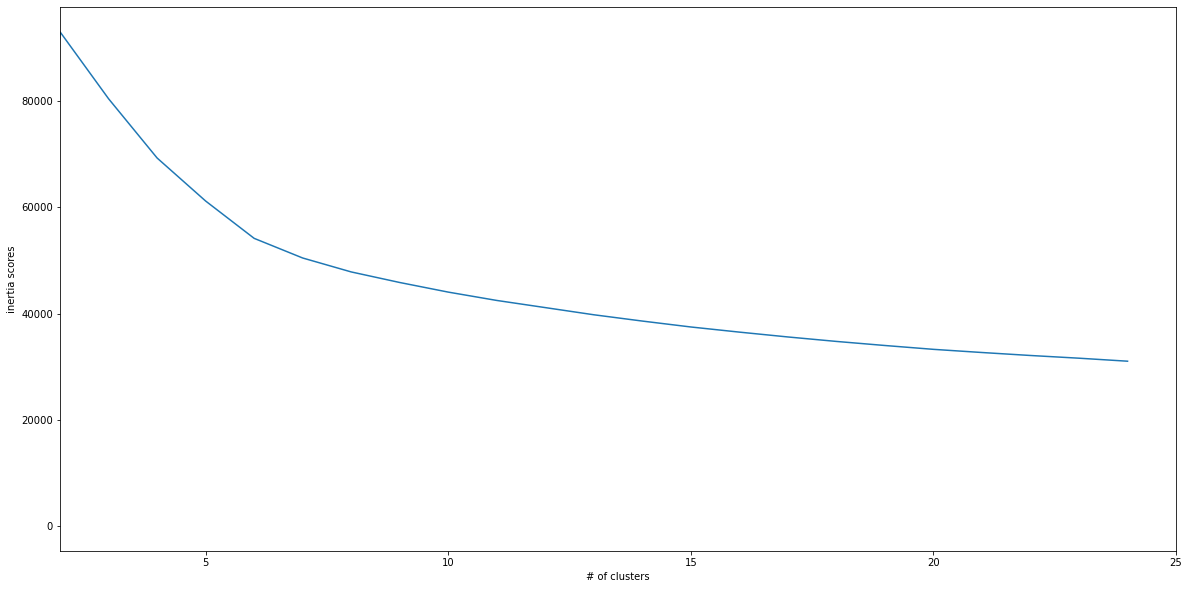

In [26]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [27]:
# running cluster
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(lsa_tfidf_data_sclaed)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able wear', 'absolutely', 'able', 'able try', 'absolute']
cluster1:
['able', 'absolute', 'able wear', 'absolutely', 'able try']
cluster2:
['able try', 'absolutely', 'absolute', 'able wear', 'able']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.025s...
[t-SNE] Computed neighbors for 20628 samples in 3.893s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

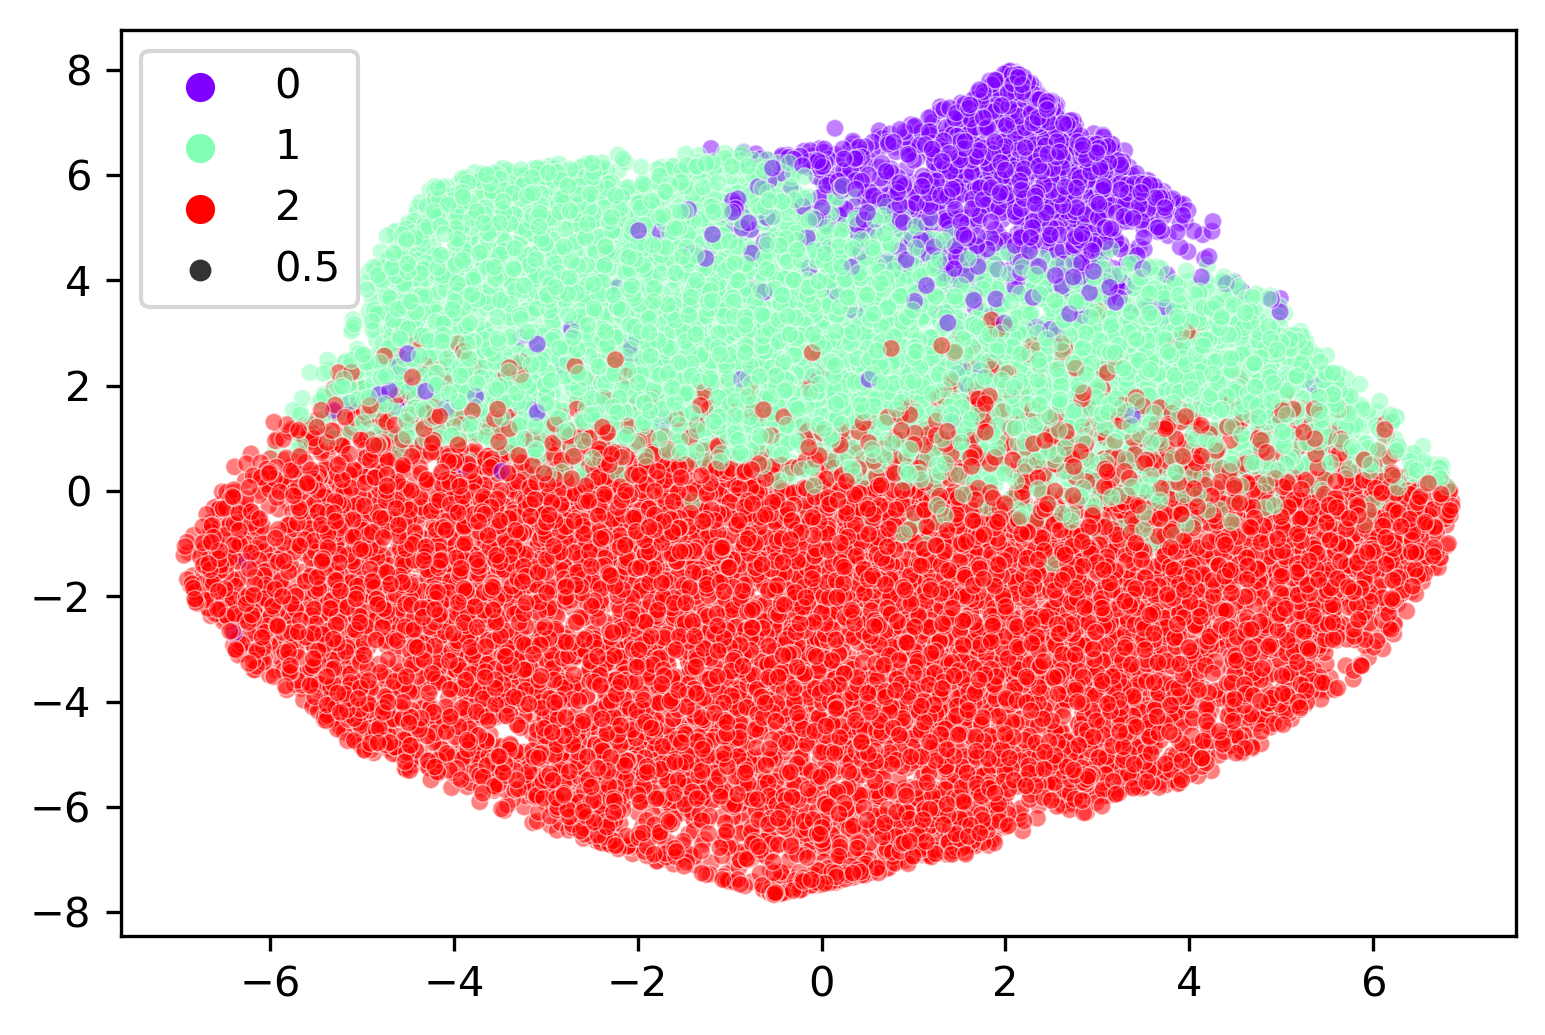

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(lsa_tfidf_data_sclaed[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [30]:
for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able wear', 'absolutely', 'able', 'able try', 'absolute']
cluster1:
['able', 'absolute', 'able wear', 'absolutely', 'able try']
cluster2:
['able try', 'absolutely', 'absolute', 'able wear', 'able']


In [31]:
kmeans.labels_

array([2, 1, 1, ..., 2, 1, 2])

In [32]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

21 I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb


26 I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat. the sleeves are very wide (although long). as a light weight fall coat the sleeves don't need to be as wide because you wouldn't be layerng too much underneath. the buttons need to be moved at least three inches in for a nicer fit. i thought about redoing the buttons myself but the sleeves looked even more out of proportion wi

In [33]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==1]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

1 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


2 I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c


5 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but i

In [34]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==2]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

0 Absolutely wonderful - silky and sexy and comfortable


3 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


4 This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


6 I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.


11 This dress is perfection! so pretty and flattering.




# Using nmf_tfidf

In [35]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(nmf_tfidf_data_scaled)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(nmf_tfidf_data_scaled, labels, metric='euclidean'))
    SSEs.append(km.inertia_)

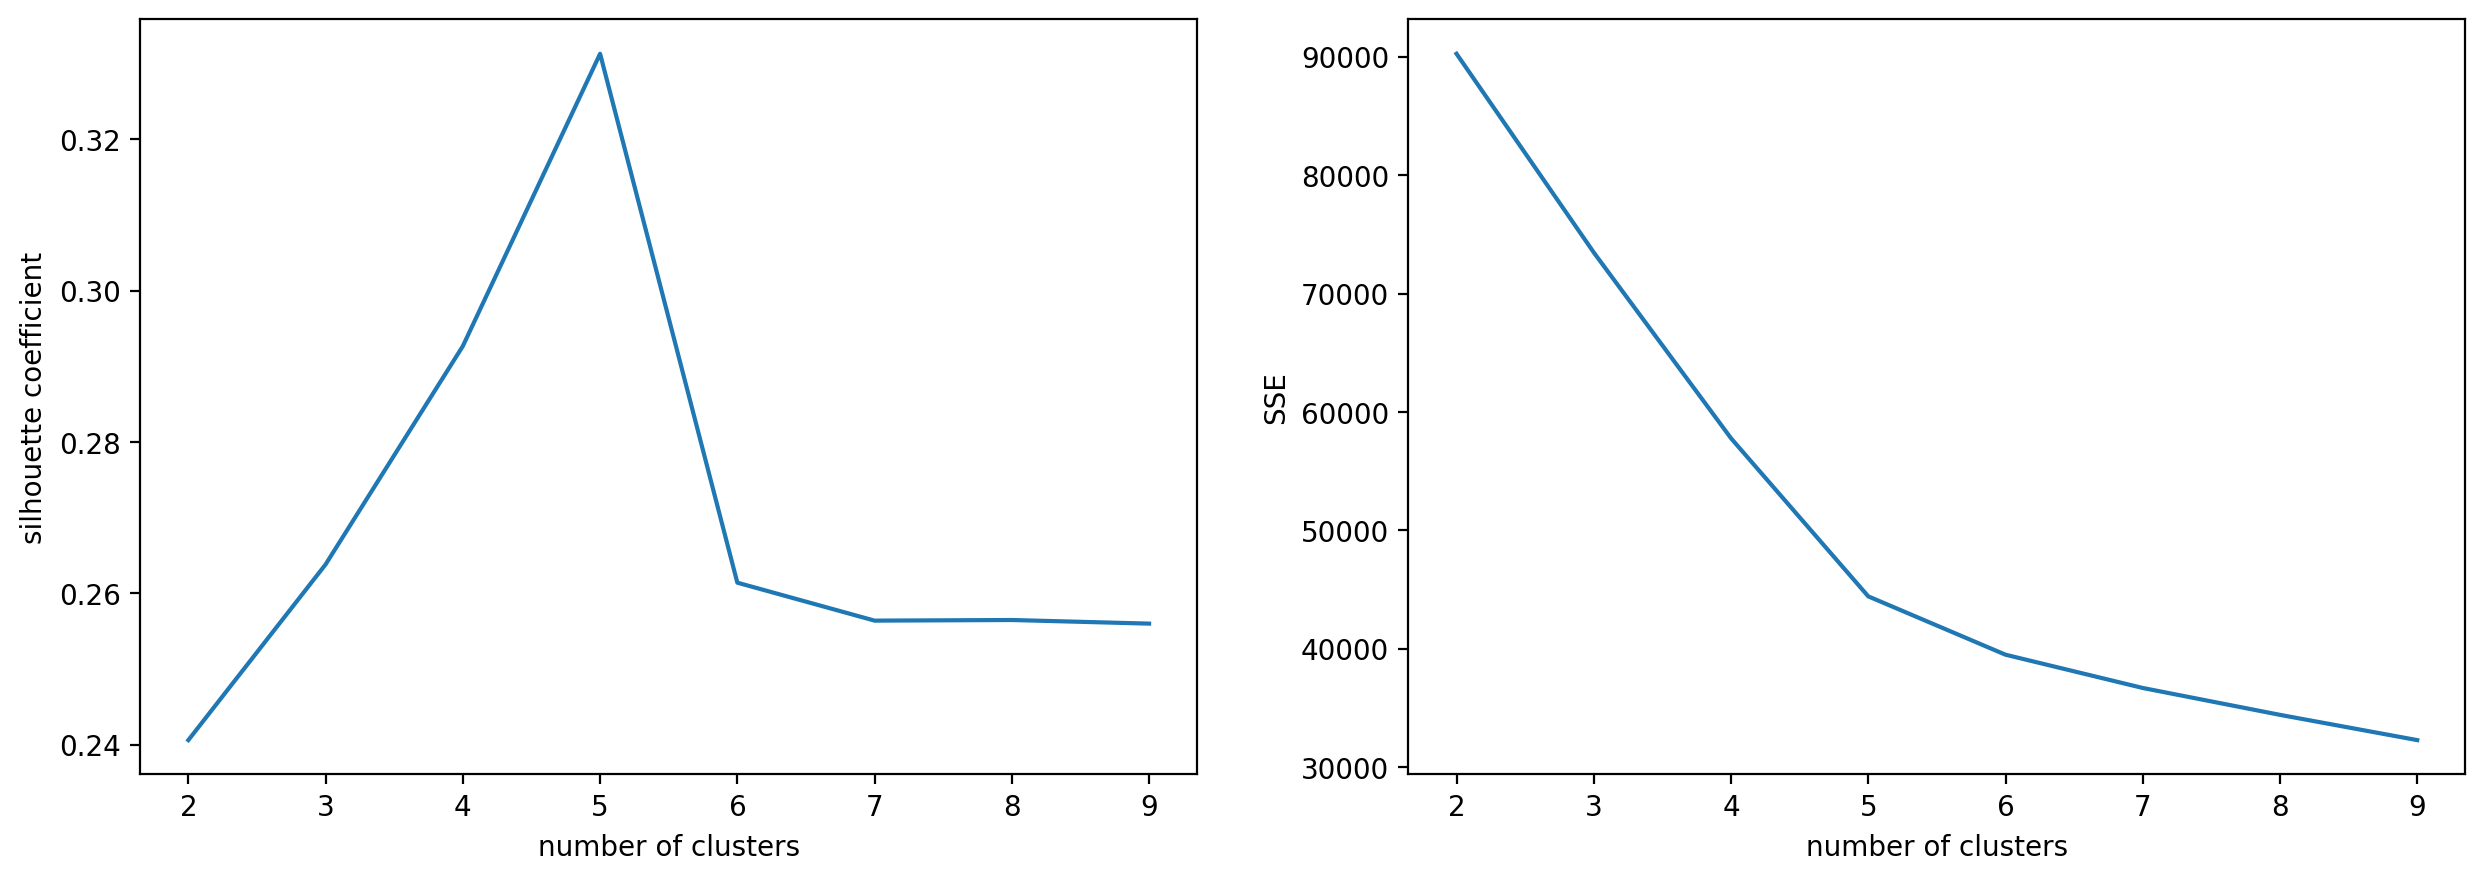

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [37]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(nmf_tfidf_data_scaled)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 90264.163967
# clusters:  3   Inertia: 73474.593874
# clusters:  4   Inertia: 57777.230403
# clusters:  5   Inertia: 44419.586668
# clusters:  6   Inertia: 39490.148414
# clusters:  7   Inertia: 36679.232267
# clusters:  8   Inertia: 34410.220408
# clusters:  9   Inertia: 32274.013528
# clusters: 10   Inertia: 30340.758234
# clusters: 11   Inertia: 28802.736572
# clusters: 12   Inertia: 27243.631802
# clusters: 13   Inertia: 26149.281596
# clusters: 14   Inertia: 25076.567282
# clusters: 15   Inertia: 24017.448126
# clusters: 16   Inertia: 23130.841355
# clusters: 17   Inertia: 22435.316097
# clusters: 18   Inertia: 21799.415974
# clusters: 19   Inertia: 21263.355674
# clusters: 20   Inertia: 20639.845616
# clusters: 21   Inertia: 20124.775666
# clusters: 22   Inertia: 19574.894458
# clusters: 23   Inertia: 19142.095185
# clusters: 24   Inertia: 18651.734339


In [38]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')

Text(0, 0.5, 'inertia scores')

In [39]:
# running cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster1:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster2:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster3:
['able', 'absolutely', 'able wear', 'absolute', 'able try']
cluster4:
['able wear', 'absolutely', 'able try', 'absolute', 'able']


In [40]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.019s...
[t-SNE] Computed neighbors for 20628 samples in 3.518s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

In [41]:
# running cluster
k = 6
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster1:
['able try', 'able', 'absolutely', 'able wear', 'absolute']
cluster2:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster3:
['able wear', 'absolutely', 'able try', 'absolute', 'able']
cluster4:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster5:
['able', 'absolutely', 'able wear', 'absolute', 'able try']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.017s...
[t-SNE] Computed neighbors for 20628 samples in 3.300s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

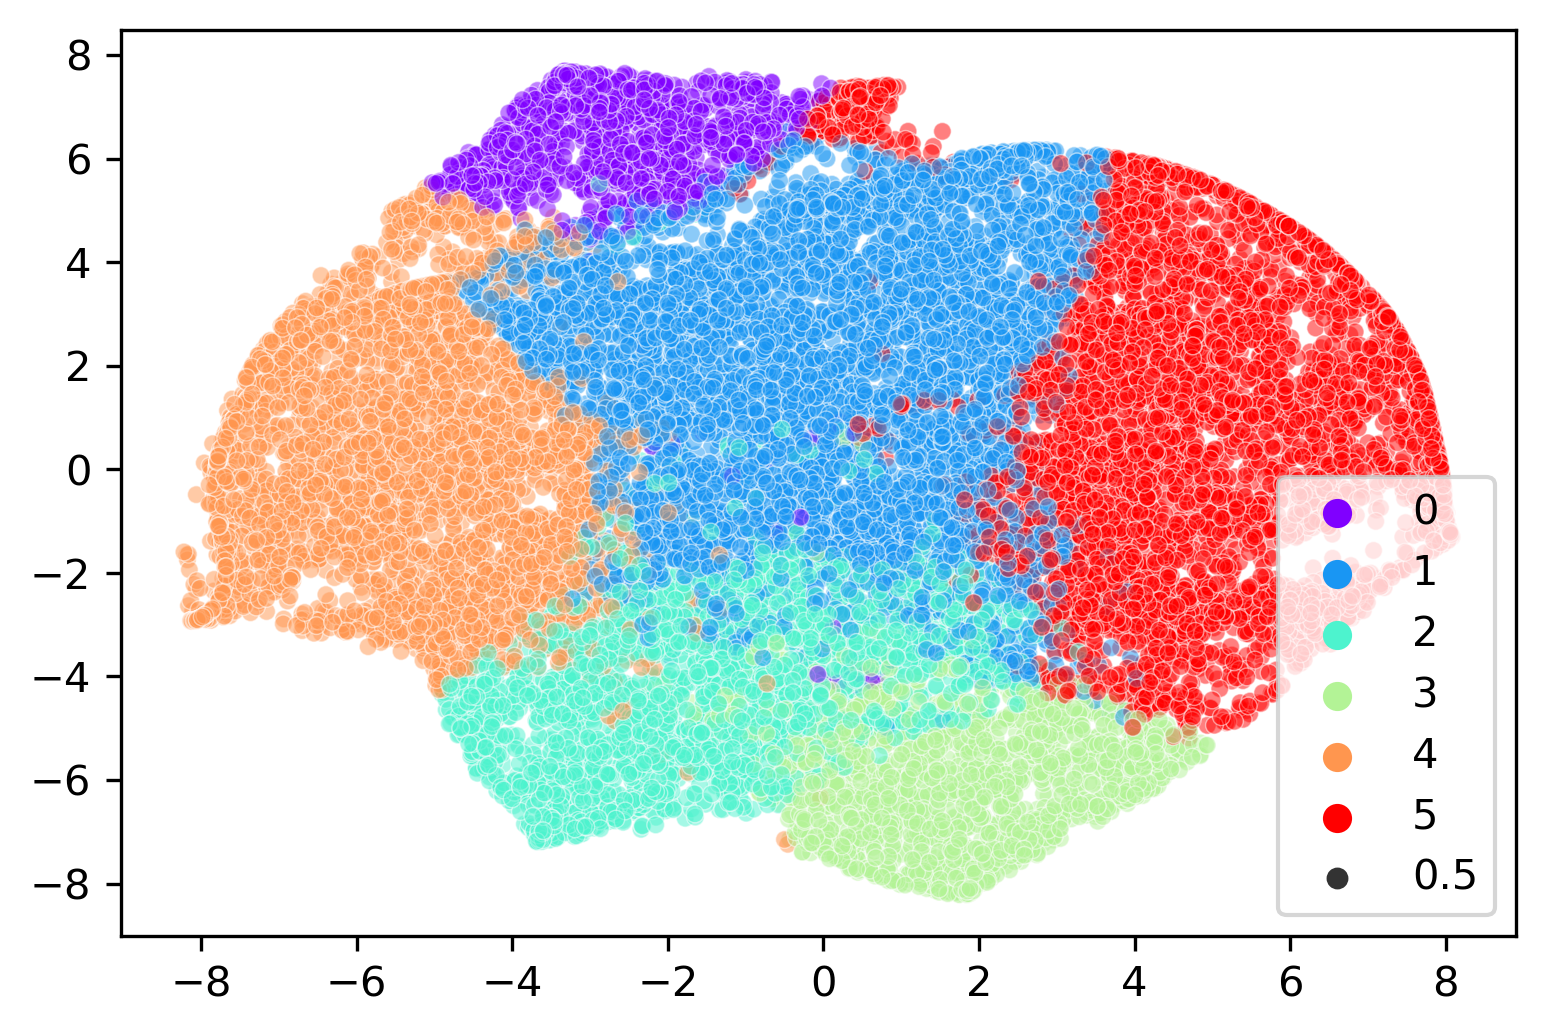

In [42]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [43]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==3]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

21 I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb


41 This is a beautiful top. it's unique and not so ordinary. i bought my usual medium and i found that it fits tight across my chest. although i had a baby this year and i am nursing, so that could be why. if i bought again i would size up.


91 This top is so much prettier in real life than it is on the model. the pattern and texture are both lovely, and the peplum is surprisingly flattering. it is definitely on the short side, but i think that gives it a modern look. the fabric does not 

# Using more grams

In [44]:
# initialize vectorizers
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

# transfomred my text data using vectorizers
cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

In [45]:
# initialized reducers with dimensions
n_comp = 5
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

# transformed my vectorizers data using reducers
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [46]:
# initialize standardscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
lsa_cv_data_sclaed = SS.fit_transform(lsa_cv_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)
nmf_cv_data_scaled = SS.fit_transform(nmf_cv_data)

In [47]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(nmf_tfidf_data_scaled)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(nmf_tfidf_data_scaled, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [49]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(nmf_tfidf_data_scaled)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 90339.377377
# clusters:  3   Inertia: 73482.609217
# clusters:  4   Inertia: 57759.579058
# clusters:  5   Inertia: 43570.032134
# clusters:  6   Inertia: 38642.533119
# clusters:  7   Inertia: 35752.114667
# clusters:  8   Inertia: 33599.415062
# clusters:  9   Inertia: 31552.505062
# clusters: 10   Inertia: 29617.530219
# clusters: 11   Inertia: 28017.863814
# clusters: 12   Inertia: 26449.145042
# clusters: 13   Inertia: 25390.406730
# clusters: 14   Inertia: 24477.228317
# clusters: 15   Inertia: 23530.973172
# clusters: 16   Inertia: 22710.513758
# clusters: 17   Inertia: 21924.976892
# clusters: 18   Inertia: 21315.931364
# clusters: 19   Inertia: 20687.919735
# clusters: 20   Inertia: 20103.805178
# clusters: 21   Inertia: 19572.940902
# clusters: 22   Inertia: 19117.100979
# clusters: 23   Inertia: 18509.635511
# clusters: 24   Inertia: 18101.325099


Text(0, 0.5, 'inertia scores')

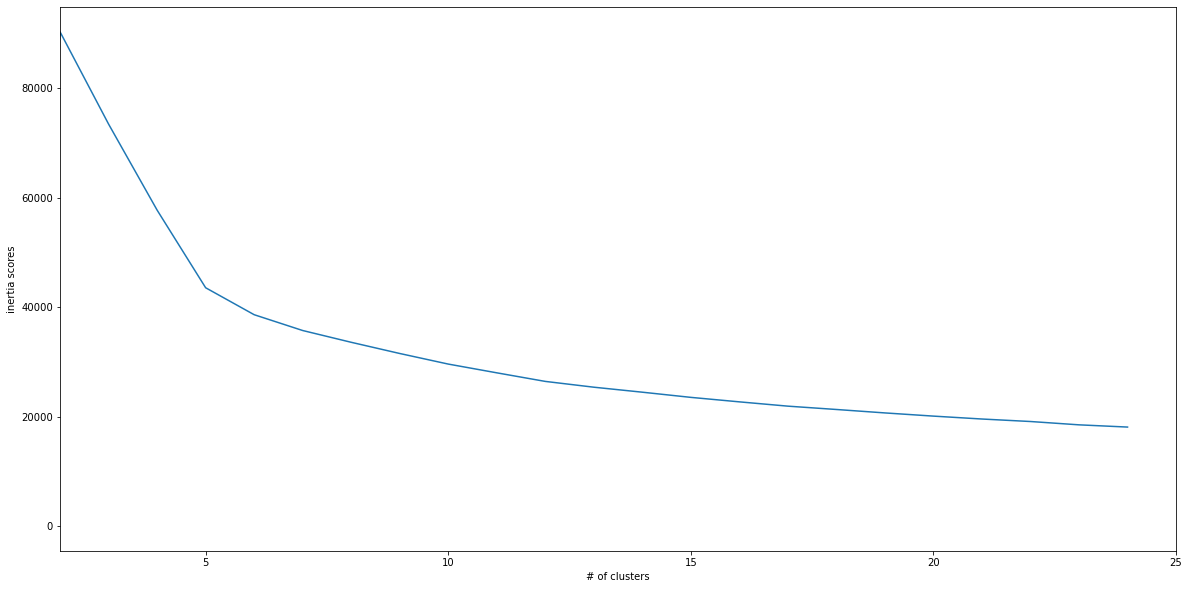

In [50]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [51]:
# running cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list)

cluster0:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster1:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster2:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster3:
['able', 'absolutely', 'able wear', 'absolute', 'able try']
cluster4:
['able wear', 'able try', 'absolutely', 'absolute', 'able']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.055s...
[t-SNE] Computed neighbors for 20628 samples in 6.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

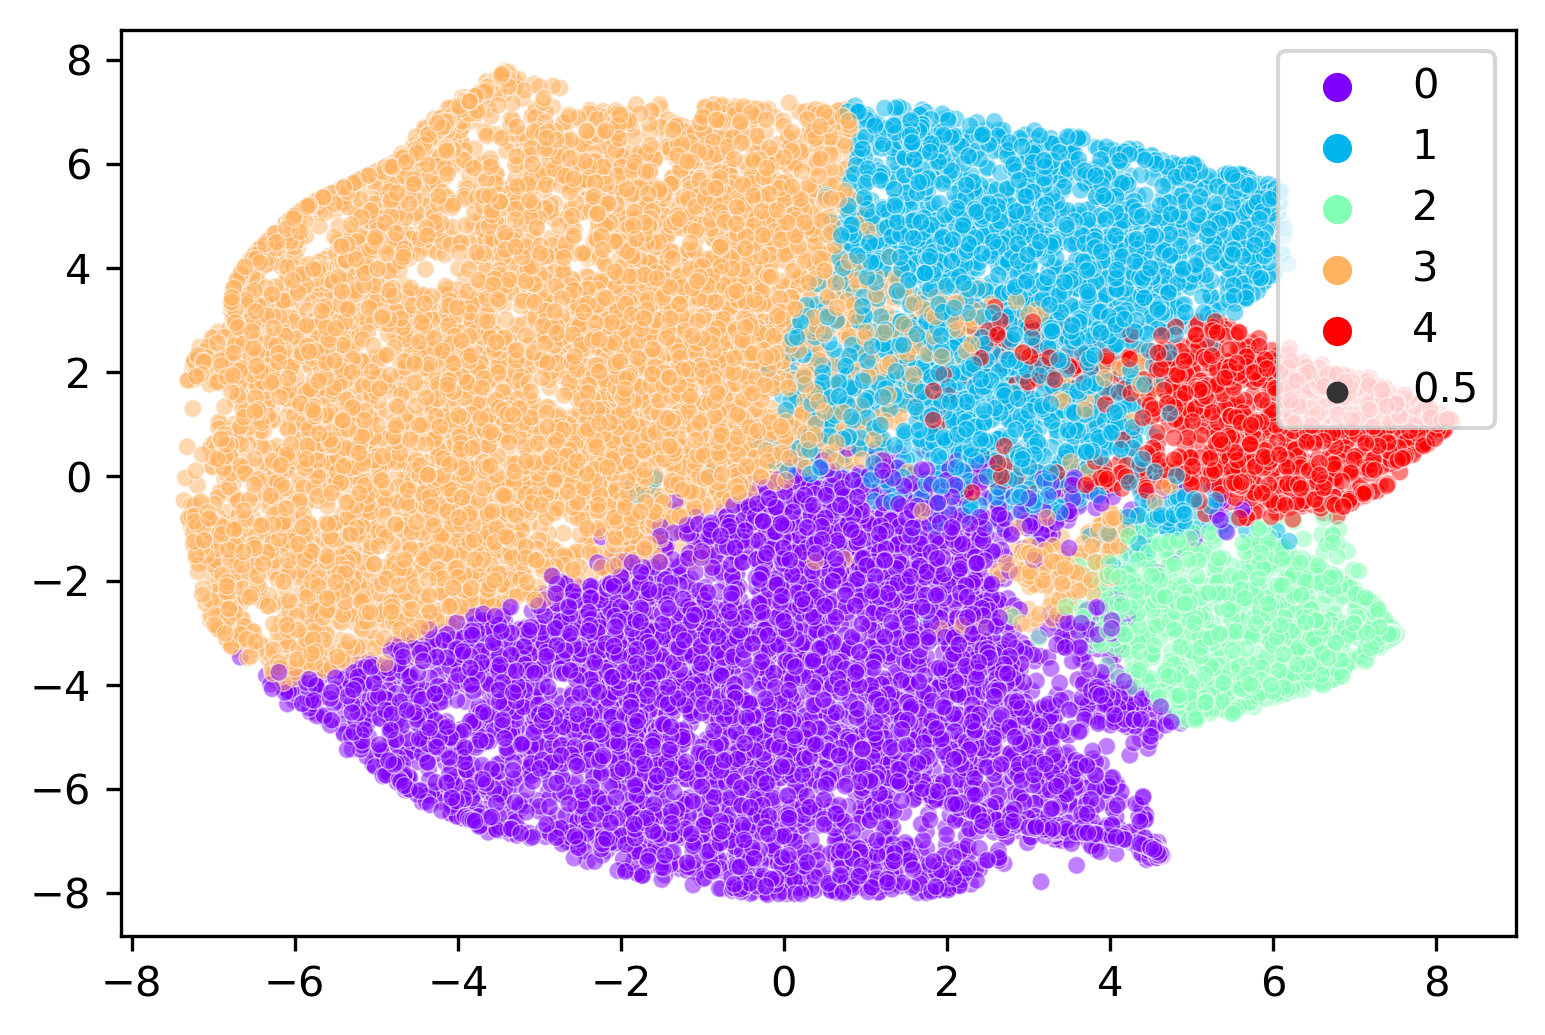

In [52]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300, random_state=42)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [53]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

0 Absolutely wonderful - silky and sexy and comfortable


3 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


17 Took a chance on this blouse and so glad i did. i wasn't crazy about how the blouse is photographed on the model. i paired it whit white pants and it worked perfectly. crisp and clean is how i would describe it. launders well. fits great. drape is perfect. wear tucked in or out - can't go wrong.


18 A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a dressier outfit.  i am 5' 5'', about 135 and the small fits great.


19 I love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year's eve. i'm small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too.




In [54]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==3]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

1 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


5 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.


6 I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and 